# ASSIGNMENT #3 - ATMOSPHERIC SOUNDINGS #
Due: 04 March 2023 @ 11:59p

Purpose:\
The purpose of this assignment is to continue to strengthen skills with reading in data and begin to familiarize with plotting data on standard plots, skew-t log-p diagrams and hodographs.

Overview:\
In this assignment you will read in atmospheric sounding data and plot that data using several methods.


| | UPDATE TO YOUR INFORMATION | 
| :- | :- |
| Created By | Tyler Stebbins |
| Creation Date | 17 January 2024 |
| Course | ATSC 270 - Computer Concepts in Meteorology |

In [1]:
### UPDATE TO YOUR INFORMATION ###
#information allowing anyone with the code to print the author and contact information
__author__    = "Tyler Stebbins"
__contact__   = "tyler.stebbins@und.edu"

### IMPORT REQUIRED LIBRARIES ###

In [2]:
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots import Hodograph, SkewT
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### OPEN SOUNDING CSV FILE ###
Open the CSV file you created last lab.  Make sure to copy it into this directory.

In [3]:
#opening the file and reading it into lists
data = pd.read_csv("KBIS_sounding.csv", delimiter=',',skiprows=1)

#print (data)

### EXTRACT VARIABLES AND ADD UNITS ###
make sure winds are converted to knots

In [4]:
#grabs the first line which is the title of the data
title = open("KBIS_sounding.csv", 'r').readlines()[0]

print(title)
#grab each variable and add units
#creating new variables for each column of data
pressure = data['pressure[mb]'].values
height = data['height[m]'].values
tmp = data['temperature[degC]'].values
dwp = data['dewpoint[degC]'].values
u = data['u-wind[m/s]'].values
v = data['v-wind[m/s]'].values

#adding units to each variable
pressure = pressure*units('millibars')
height = height*units('meters')
tmp = tmp*units('degC')
dwp = dwp*units('degC')
u = u*units('m/s')
v = v*units('m/s')

print(v)
print (' ')
#converting U and V components to knots

u = u.to('knots')
v = v.to('knots')

print(v)

KBIS - 2009-01-15 12:00:00

[nan nan nan nan -0.8 nan nan -4.46 nan nan nan nan -16.78 nan nan -34.04 nan nan nan -54.14 -62.11 nan -56.56 nan nan nan -46.16 nan nan nan nan nan nan -48.83 nan nan nan nan nan -37.08 nan nan -35.29 nan nan nan -42.56 nan -41.83 -40.38 nan] meter / second
 
[nan nan nan nan -1.555075593952484 nan nan -8.669546436285097 nan nan nan nan -32.617710583153354 nan nan -66.16846652267819 nan nan nan -105.23974082073435 -120.73218142548596 nan -109.94384449244062 nan nan nan -89.72786177105831 nan nan nan nan nan nan -94.91792656587474 nan nan nan nan nan -72.07775377969763 nan nan -68.59827213822895 nan nan nan -82.73002159827215 nan -81.3110151187905 -78.49244060475164 nan] knot


### PLOT TEMPERATURE & DEWPOINT VS HEIGHT ###

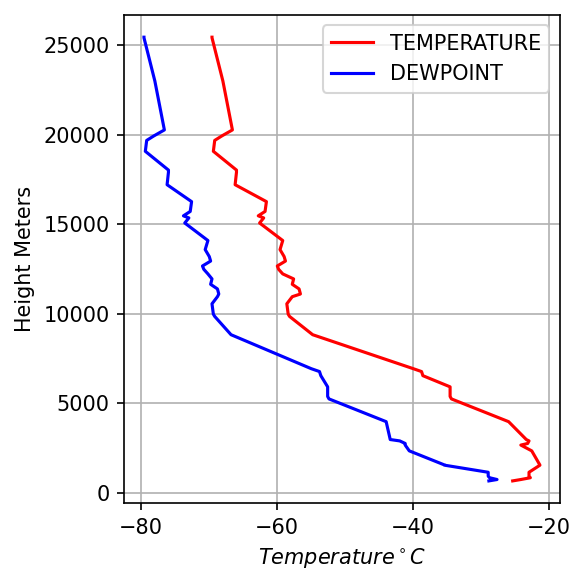

In [17]:
#create a figure
fig = plt.figure(figsize = (4,4), dpi = 150)

#create subplot
plot1 = plt.subplot(1,1,1)


#plot temperature on the x-axis, height on the y-axis in red
#give it the label of TEMPERATURE
plt.plot(tmp, height, color = 'red', label = 'TEMPERATURE')


#plot dewpoint in blue
#give it the label of DEWPOINT
plt.plot(dwp, height, color = 'blue', label = 'DEWPOINT')

#add a background grid
plt.grid()

#add a x label with units (including the degree symbol) - google it and figure it out :)
plt.xlabel("$Temperature {^\circ}C$")

#add a y label with units 
plt.ylabel("Height Meters")

#add a legend
plt.legend()

#this is added to make sure labels don't get cut off
fig.tight_layout()
#save the figure as temp_dwpt.png
plt.savefig('temp_dwpt.png')

While this is nice, it's not particularly useful to us for analyzing the current weather or making a forecast.

For that, we typically examine Skew-T Log-P diagrams.  For this, we will be following a modified version of the "Skew-T with Complex Layout" example on MetPy's website (https://unidata.github.io/MetPy/latest/examples/plots/Skew-T_Layout.html)

### PLOT DATA ON SKEW-T ###

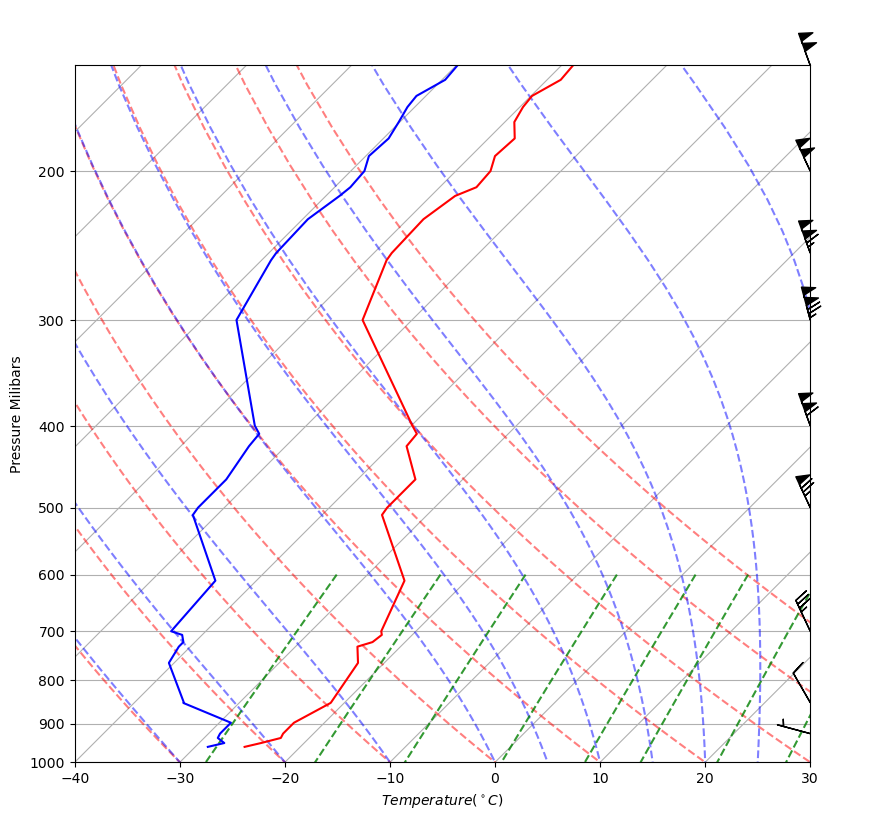

In [37]:
#create a figure and give it a figsize of 9x9, with a dpi of 100
fig = plt.figure(figsize = (9,9), dpi = 100)

#create Skew-T
skew = SkewT(fig,rotation=45)

#add dry adiabats
skew.plot_dry_adiabats()
#add moist adiabats
skew.plot_moist_adiabats()
#add mixing ratio lines
skew.plot_mixing_lines()

#add a x axis labels with units
plt.xlabel("$Temperature {^\circ}C$")

#add a y label with units 
plt.ylabel("Pressure Milibars")

#add temperature in red
skew.plot(pressure, tmp, color = 'red')

#add dewpoint in blue
skew.plot(pressure, dwp, color = 'blue')

#plot wind barbs
skew.plot_barbs(pressure, u, v)

#set x-axis limits that look good (use your eyes)
skew.ax.set_xlim(-40,30)

#set y-axis limits that include the tropopause but not a ton of the stratosphere
skew.ax.set_ylim(1000, 150)

#to make sure everything looks okay
fig.tight_layout()

#save the skew T as skewT.png


### PLOT HODOGRAPH ###
The plot will not look correct if you do not remove NaNs

In [ ]:
#remove nans from u and v
u_hodo = u.dropna()


#create the hodograph (have the range from 0-100kts with 25kt increment)
#make the wind curve black

#add x and y labels

#to make sure everything looks okay
fig.tight_layout()

#save figure as hodo.png


### PLOT SKEW-T & HODOGRAPH ON SAME FIGURE ###

In [ ]:
fig = plt.figure(figsize=(9,9),dpi=100)

gs = gridspec.GridSpec(3,3)
skew = SkewT(fig, rotation=45, subplot=gs[:,:2])

#add dry adiabats

#add moist adiabats

#add mixing ratio lines


#add axis labels with units

#add a y label with units 


#add temperature in red

#add dewpoint in blue


#plot wind barbs


#set x-axis limits that look good (use your eyes)

#set y-axis limits that include the tropopause but not a ton of the stratosphere

#add a hodograph
ax = fig.add_subplot(gs[0,-1])

#add x and y labels

#add a title with the date and launch location:
plt.suptitle(title)

#to make sure everything looks okay
fig.tight_layout()

#save the figure as skew_hodo.png
